In [2]:

from fastai import *
from fastai.vision import *
import numpy as np
import os
print(os.getcwd())

/media/arrowhead/WD2


In [3]:
SNRs= [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]

for i in SNRs:
    path = Path("/media/arrowhead/WD2/datasets/test/"+str(i))
    a = ImageDataBunch.from_folder(path, valid_pct=0.9, num_workers=8, bs=256)
    learn = cnn_learner(a, models.resnet18, metrics=[accuracy, error_rate])
    learn.load("/media/arrowhead/WD2/datasets/models/model-1_10e")
    print( "SNR: %d | Accuracy: %.4f"%(i, learn.validate(a.valid_dl)[2]))


SNR: 2 | Accuracy: 0.5231


SNR: 4 | Accuracy: 0.4560


SNR: 6 | Accuracy: 0.4367


SNR: 8 | Accuracy: 0.4071


SNR: 10 | Accuracy: 0.3986


SNR: 12 | Accuracy: 0.3992


SNR: 14 | Accuracy: 0.4154


SNR: 16 | Accuracy: 0.3947


SNR: 18 | Accuracy: 0.3890


SNR: 20 | Accuracy: 0.3873


SNR: 22 | Accuracy: 0.3966


SNR: 24 | Accuracy: 0.3983


SNR: 26 | Accuracy: 0.3887


SNR: 28 | Accuracy: 0.3853


SNR: 30 | Accuracy: 0.4057


SNR: -20 | Accuracy: 0.9604


SNR: -18 | Accuracy: 0.9615


SNR: -16 | Accuracy: 0.9528


KeyboardInterrupt: 

In [4]:
import csv
SNRs= [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]
SNRs = sorted(SNRs)
with open('./results_2018.csv', 'w+') as f:
    csv_writer = csv.writer(f)
    fields = ['SNR', 'Accuracy']
    csv_writer.writerow(fields)
    for i in SNRs:
        path = Path("/media/arrowhead/WD2/datasets/test/"+str(i))
        a = ImageDataBunch.from_folder(path, valid_pct=0.9, num_workers=8, bs=256)
        learn = cnn_learner(a, models.resnet18, metrics=[accuracy])
        learn.load("/media/arrowhead/WD2/datasets/models/model-1_10e")
        accu = 100*learn.validate(dl= a.valid_dl, metrics=[accuracy])[1]
        abc = [i, accu]
        csv_writer.writerow(abc)
        print( "SNR: %d | Accuracy: %.4f"%(i, abc[1]))
        # preds,y,losses = learn.get_preds(with_loss=True)
        # interp = ClassificationInterpretation(learn, preds, y, losses)
        # print('______________________________'+ str(i)+'________________________')
        # interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
        


SNR: -20 | Accuracy: 4.0485


SNR: -18 | Accuracy: 4.1448


SNR: -16 | Accuracy: 4.7425


SNR: -14 | Accuracy: 4.0431


SNR: -12 | Accuracy: 4.3402


SNR: -10 | Accuracy: 5.0165


SNR: -8 | Accuracy: 6.5399


SNR: -6 | Accuracy: 9.9798


SNR: -4 | Accuracy: 16.7648


SNR: -2 | Accuracy: 27.1373


SNR: 0 | Accuracy: 36.5286


SNR: 2 | Accuracy: 47.3004


SNR: 4 | Accuracy: 54.4250


SNR: 6 | Accuracy: 56.4692


SNR: 8 | Accuracy: 59.4453


SNR: 10 | Accuracy: 60.6693


SNR: 12 | Accuracy: 59.8257


SNR: 14 | Accuracy: 58.7528


SNR: 16 | Accuracy: 60.0179


SNR: 18 | Accuracy: 61.2773


SNR: 20 | Accuracy: 61.8533


SNR: 22 | Accuracy: 60.1180


SNR: 24 | Accuracy: 60.4148


SNR: 26 | Accuracy: 61.1999


SNR: 28 | Accuracy: 61.5367


SNR: 30 | Accuracy: 59.5687


Text(0.5, 1.0, 'Accuracy at each SNR vs SNR (l = 256)')

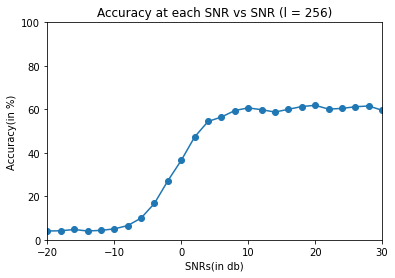

In [6]:
SNRs= [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]
SNRs = sorted(SNRs)
import pandas as pd
import matplotlib.pyplot as plt
performance_dict = {
    -20: 4.0485, 
    -18: 4.1448,
    -16: 4.7425,
    -14: 4.0431,
    -12: 4.3402,
    -10: 5.0165,
    -8: 6.5399,
    -6: 9.9798,
    -4: 16.7648,
    -2: 27.1373, 
    0: 36.5286,
    2: 47.3004,
    4: 54.4250,
    6: 56.4692,
    8: 59.4453,
    10: 60.6693,
    12: 59.8257,
    14: 58.7528, 
    16: 60.0179,
    18: 61.2773,
    20: 61.8533,
    22: 60.1180,
    24: 60.4148,
    26: 61.1999,
    28: 61.5367,
    30: 59.5687
}


plt.plot(list(performance_dict.keys()), list(performance_dict.values()), '-o')
plt.axis([-20, 30, 0, 100])
plt.xlabel("SNRs(in db)")
plt.ylabel("Accuracy(in %)")
plt.title("Accuracy at each SNR vs SNR (l = 256)")